Final Project By:

Oluwatoyin Ibinayo- 100939472  
Azmi Shavez- 100938606  
Lorenc Beqiri- 100943621  
Adeniyi Abiodun- 100915263

Importing:   
This block imports the necessary libraries for data manipulation, visualization, and natural language processing (NLP) tasks. It also downloads the required NLTK resources, such as stopwords, word tokenizer, and WordNet corpus.

In [336]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk import word_tokenize
import string, re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import LancasterStemmer, PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

# Set plot style
sns.set_style("whitegrid")

print("Libraries imported successfully.")

Libraries imported successfully.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shave\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shave\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [337]:
# 1.Data Cleaning
# 2.EDA
# 3.Data Preprocessing
# 4.Model Building
# 5.Predicting


1.Data Cleaning:  
This block loads the SMS spam dataset, renames the columns, and performs basic data cleaning tasks such as handling missing values and removing duplicates. It also resets the index of the dataframe.

In [338]:
# 1. Data Cleaning
print("Starting data cleaning...")

try:
    # Load the SMS spam dataset
    data = pd.read_csv("SMSSpamCollection", sep="\t", header=None)

    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: SMSSpamCollection file not found.")
    exit()
# Rename the columns
data.rename(columns={0: 'Category', 1: "Email Text"}, inplace=True)
print("Columns renamed successfully.")

# Check for missing values
missing_values = data.isnull().sum().sum()
if missing_values > 0:
    print(f"Warning: Data contains {missing_values} missing values.")

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
if duplicate_rows > 0:
    print(f"Warning: Data contains {duplicate_rows} duplicate rows.")

# Drop duplicate rows
data = data.drop_duplicates(keep='first')
print("Duplicate rows dropped successfully.")

# Recheck for remaining duplicates
remaining_duplicates = data.duplicated().sum()
if remaining_duplicates > 0:
    print(f"Warning: Data still contains {remaining_duplicates} duplicate rows after deduplication.")

# Reset the index
data = data.reset_index(drop=True)
print("Index reset successfully.")

print("Data cleaning completed.")

Starting data cleaning...
Dataset loaded successfully.
Columns renamed successfully.
Duplicate rows dropped successfully.
Index reset successfully.
Data cleaning completed.


In [339]:
data

,Category,Email Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...
5165,ham,Will ü b going to esplanade fr home?
5166,ham,"Pity, * was in mood for that. So...any other s..."
5167,ham,The guy did some bitching but I acted like i'd...


2. EDA:
This block performs exploratory data analysis (EDA) on the SMS spam dataset. It calculates the percentage of non-spam (ham) and spam emails, creates a pie chart to visualize the distribution, and adds new features like the number of characters, words, and sentences for each email. It also provides summary statistics for the overall dataset and for ham and spam emails separately. The block includes error handling for the case where there was an exception while creating the pie chart.

C:\Users\shave\AppData\Local\Temp\ipykernel_40460\1214224423.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ham_percentage = round(data['Category'].value_counts()[0] / len(data) * 100, 2)
C:\Users\shave\AppData\Local\Temp\ipykernel_40460\1214224423.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spam_percentage = round(data['Category'].value_counts()[1] / len(data) * 100, 2)


Starting exploratory data analysis...
Email Not Spam: 87.37%
Spam Email: 12.63%


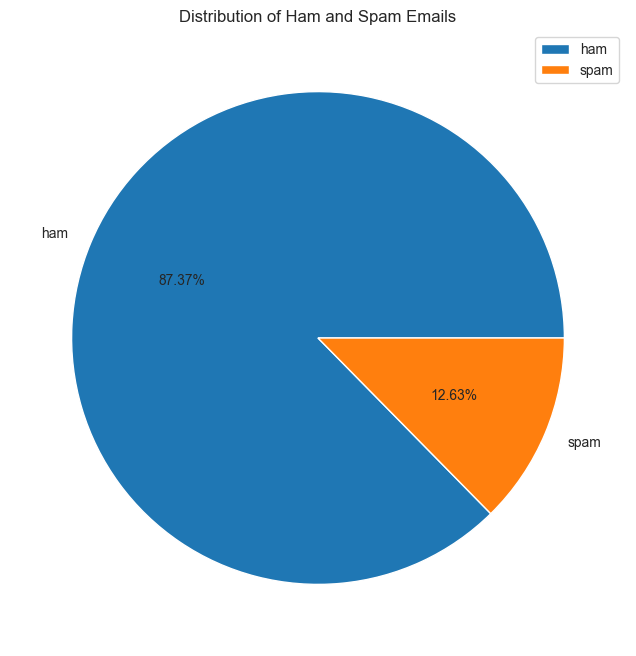

Pie chart created successfully.
New features added to the dataset.
Overall dataset statistics:
       num_characters    num_words     num_sent
count     5169.000000  5169.000000  5169.000000
mean        79.344554    18.593538     1.974076
std         58.437457    13.402779     1.458967
min          2.000000     1.000000     1.000000
25%         36.000000     9.000000     1.000000
50%         61.000000    15.000000     1.000000
75%        119.000000    26.000000     2.000000
max        910.000000   220.000000    38.000000
Statistics for ham emails:
       num_characters    num_words     num_sent
count     4516.000000  4516.000000  4516.000000
mean        70.905890    17.267715     1.827724
std         56.715046    13.588065     1.394338
min          2.000000     1.000000     1.000000
25%         34.000000     8.000000     1.000000
50%         53.000000    13.000000     1.000000
75%         91.000000    22.000000     2.000000
max        910.000000   220.000000    38.000000
Statistics for

In [340]:
# 2. Exploratory Data Analysis (EDA)
print("Starting exploratory data analysis...")

# Calculate the percentage of non-spam (ham) and spam emails
ham_percentage = round(data['Category'].value_counts()[0] / len(data) * 100, 2)
spam_percentage = round(data['Category'].value_counts()[1] / len(data) * 100, 2)
print(f"Email Not Spam: {ham_percentage}%")
print(f"Spam Email: {spam_percentage}%")

# Create a pie chart to visualize the distribution
try:
    plt.figure(figsize=(8, 8))
    plt.pie(data['Category'].value_counts(), labels=['ham', 'spam'], autopct='%.2f%%')
    plt.title('Distribution of Ham and Spam Emails')
    plt.legend()
    plt.show()
    print("Pie chart created successfully.")
except Exception as e:
    print(f"Error creating pie chart: {e}")

# Add new features to the dataset
data['num_characters'] = data['Email Text'].apply(len)
data['num_words'] = data['Email Text'].apply(lambda x: len(nltk.word_tokenize(x)))
data['num_sent'] = data['Email Text'].apply(lambda x: len(nltk.sent_tokenize(x)))
print("New features added to the dataset.")

# Describe the overall statistics
print("Overall dataset statistics:")
print(data.describe())

# Describe the statistics for ham and spam emails separately
print("Statistics for ham emails:")
print(data[data['Category'] == 'ham'].describe())
print("Statistics for spam emails:")
print(data[data['Category'] == 'spam'].describe())

print("Exploratory data analysis completed.")

3.Data Preprocessing:
This block defines a function to clean the text data, which includes tokenization, removing special characters, stop words, and applying stemming. The cleaned text is then added as a new column to the dataset. The block includes error handling for the case where there was an exception in the clean_text function.

In [341]:
# 3. Data Preprocessing
print("Starting data preprocessing...")

# Initialize text preprocessing techniques
port_stemmer = PorterStemmer()
lan_stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

# Define a function to clean the text data
def clean_text(text):
    try:
        # Tokenize the text
        text = word_tokenize(text)
        # Join the tokens back into a string
        text = " ".join(text)

        # Remove punctuation
        text = [char for char in text if char not in string.punctuation]
        text = ''.join(text)

        # Remove numbers
        text = [char for char in text if char not in re.findall(r"[0-9]", text)]
        text = ''.join(text)

        # Convert to lowercase and remove stopwords
        text = [word.lower() for word in text.split() if word.lower() not in set(stopwords.words('english'))]
        text = ' '.join(text)

        # Apply stemming
        text = list(map(lambda x: port_stemmer.stem(x), text.split()))
        text = ' '.join(text)

        return text
    except Exception as e:
        print(f"Error in clean_text function: {e}")
        return text

# Apply the cleaning function to the 'Email Text' column
data['Clean Email'] = data['Email Text'].apply(clean_text)
print("Text cleaning completed.")

print("Data preprocessing finished.")

Starting data preprocessing...
Text cleaning completed.
Data preprocessing finished.


In [342]:
data.head()

,Category,Email Text,num_characters,num_words,num_sent,Clean Email
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah nt think goe usf live around though


In [343]:
data.describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.593538,1.974076
std,58.437457,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


4.Model Building:    
This block encodes the target variable (Category) to numerical values, converts the text data into a numerical format using TF-IDF vectorization, and splits the data into training and testing sets. It then trains three different Naive Bayes models (Gaussian, Multinomial, and Bernoulli) and saves the trained Multinomial Naive Bayes model and the TF-IDF vectorizer. Finally, it demonstrates how to load the saved model and vectorizer to make predictions on a new SMS message. The block includes error handling for various exceptions that may occur during the model building and prediction steps.

In [344]:
# 4. Model Building
print("Starting model building...")

# Encode the target variable (Category) to numerical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['Category'])

# Convert the text data to numerical format using TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)
try:
    X = tf.fit_transform(data['Clean Email']).toarray()
    y = data['target'].values
    print("TF-IDF vectorization completed.")
except Exception as e:
    print(f"Error during TF-IDF vectorization: {e}")
    exit()

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
    print("Train-test split completed.")
except Exception as e:
    print(f"Error during train-test split: {e}")
    exit()

# Train three different Naive Bayes models
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# Train the Gaussian Naive Bayes model and make predictions on the test set
try:
    gnb.fit(X_train, y_train)
    y_pred1 = gnb.predict(X_test)
    print("Gaussian Naive Bayes model trained successfully.")
except Exception as e:
    print(f"Error training Gaussian Naive Bayes model: {e}")
    exit()

# Train the Multinomial Naive Bayes model and make predictions on the test set
try:
    mnb.fit(X_train, y_train)
    y_pred2 = mnb.predict(X_test)
    print("Multinomial Naive Bayes model trained successfully.")
except Exception as e:
    print(f"Error training Multinomial Naive Bayes model: {e}")
    exit()

# Train the Bernoulli Naive Bayes model and make predictions on the test set
try:
    bnb.fit(X_train, y_train)
    y_pred3 = bnb.predict(X_test)
    print("Bernoulli Naive Bayes model trained successfully.")
except Exception as e:
    print(f"Error training Bernoulli Naive Bayes model: {e}")
    exit()

# Save the trained Multinomial Naive Bayes model and the TF-IDF vectorizer
import pickle
try:
    pickle.dump(tf, open('vectorizer.pkl', 'wb'))
    pickle.dump(mnb, open('model.pkl', 'wb'))
    print("Model and vectorizer saved successfully.")
except Exception as e:
    print(f"Error saving the model and vectorizer: {e}")
    exit()

# Load the saved model and vectorizer
try:
    tf_idf = pickle.load(open("vectorizer.pkl", 'rb'))
    models = pickle.load(open("model.pkl", 'rb'))
    print("Model and vectorizer loaded successfully.")
except Exception as e:
    print(f"Error loading the model and vectorizer: {e}")
    exit()

Starting model building...
TF-IDF vectorization completed.
Train-test split completed.
Gaussian Naive Bayes model trained successfully.
Multinomial Naive Bayes model trained successfully.
Bernoulli Naive Bayes model trained successfully.
Model and vectorizer saved successfully.
Model and vectorizer loaded successfully.


5.Predicting

In [345]:

# Predict on a 1st sample
sms = "We're happy to inform you that you're entitled to a refund for overpayment on your AMEX account. Click on this link [Link] below to claim your refund."
transformed_sms = clean_text(sms)
try:
    vect_input = tf_idf.transform([transformed_sms])
    result = models.predict(vect_input)[0]
    if result == 1:
        print("Spam")
    else:
        print("Not Spam")
    print("Prediction made successfully.")
except Exception as e:
    print(f"Error making prediction on the new sample: {e}")
    exit()


Spam
Prediction made successfully.


In [346]:

# Predict on a 2nd sample
sms = "Nah I don't think he goes to usa, he lives around here though"
transformed_sms = clean_text(sms)
try:
    vect_input = tf_idf.transform([transformed_sms])
    result = models.predict(vect_input)[0]
    if result == 1:
        print("Spam")
    else:
        print("Not Spam")
    print("Prediction made successfully.")
except Exception as e:
    print(f"Error making prediction on the new sample: {e}")
    exit()


Not Spam
Prediction made successfully.
